## PART A: THEORY QUESTIONS

### Q1. What is a Support Vector Machine (SVM)?
Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In classification, its primary objective is to find the optimal hyperplane that separates data points of different classes with the maximum margin.

---

### Q2. Define the following terms in the context of SVM:
- **Hyperplane**: A decision boundary that separates different classes in feature space.
- **Support Vectors**: Data points that lie closest to the hyperplane. These points influence the position and orientation of the hyperplane.
- **Margin**: The distance between the hyperplane and the nearest support vectors from either class.

---

### Q3. Why does SVM aim to maximize the margin?
Maximizing the margin helps improve model generalization. A larger margin reduces the chance of overfitting, as the classifier becomes less sensitive to slight noise in the data.

---

### Q4. Difference between Hard Margin and Soft Margin in SVM:
- **Hard Margin**: No misclassification allowed; assumes perfect linear separability.
- **Soft Margin**: Allows some misclassification to handle noise and overlapping classes using slack variables and penalty parameter **C**.

---

### Q5. What is the Kernel Trick?
The kernel trick allows SVM to operate in a higher-dimensional feature space without explicitly computing the transformation. This helps to find a non-linear decision boundary.

---

### Q6. Types of Kernels:
- **Linear**: Suitable when data is linearly separable.
- **Polynomial**: Captures polynomial relationships of degree `d`.
- **RBF (Radial Basis Function)**: Popular for non-linear data; it maps features into infinite-dimensional space.

---

### Q7. Hyperparameters:
- **C**: Regularization parameter controlling margin size vs classification error. Low C = wider margin (more regularization).
- **Gamma**: Controls influence of single training examples. High gamma = close influence (overfitting), low gamma = far influence (underfitting).

---

### Q8. Real-world Use Cases:
1. **Email Spam Detection**: SVM can classify emails into spam or not spam based on content features.
2. **Face Detection**: SVM separates face vs non-face regions using pixel intensity features.

---

### Q9. When to use:
- **Linear Kernel**: When the data is linearly separable or has many features.
- **RBF Kernel**: When the relationship between features is non-linear.

---

### Q10. Pros and Cons of SVM:
**Advantages:**
1. Effective in high-dimensional spaces.
2. Works well with clear margin of separation.

**Disadvantages:**
1. Not suitable for large datasets (slow training).
2. Poor performance when data is noisy or overlapping.


In [1]:
# PART B: PRACTICAL ASSIGNMENT
# Q1. Import the dataset and display first 5 rows
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


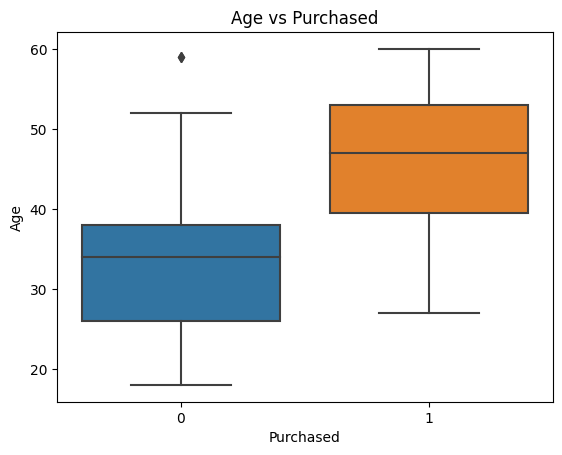

In [2]:
# Q2. Perform EDA
# Check null values
df.isnull().sum()
# Value counts for Purchased
df['Purchased'].value_counts()
# Plot Age vs Purchased
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Age vs Purchased')
plt.show()


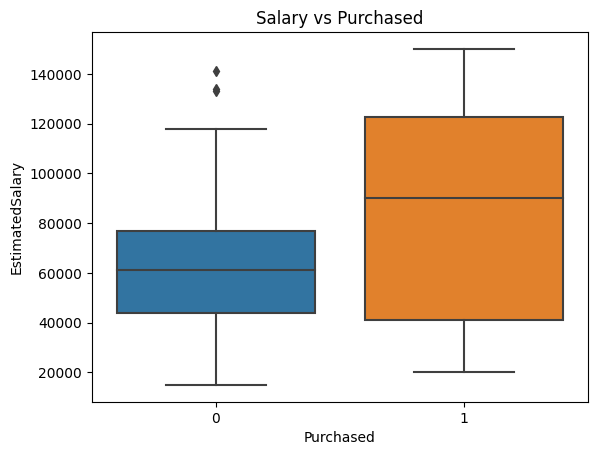

In [3]:
# Plot Salary vs Purchased
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Salary vs Purchased')
plt.show()


In [4]:
# Q3. Preprocessing

# Use only Age and Salary
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
#  Q4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [6]:
# Q5. Train SVM models (Linear and RBF)

# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [8]:
# Q6. Model Evaluation

# Linear
y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))


Linear SVM Accuracy: 0.86
Confusion Matrix:
 [[61  2]
 [12 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [9]:
# RBF
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.93
Confusion Matrix:
 [[57  6]
 [ 1 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



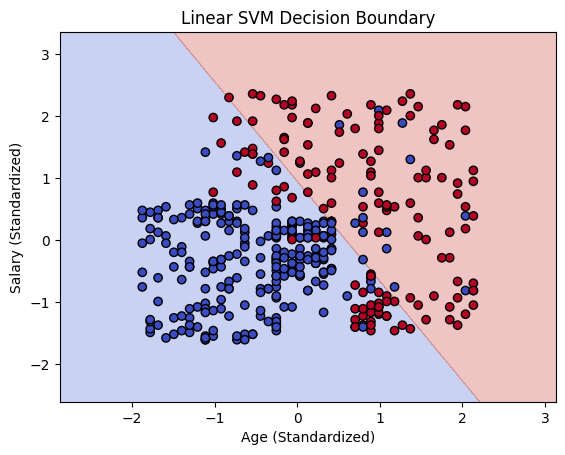

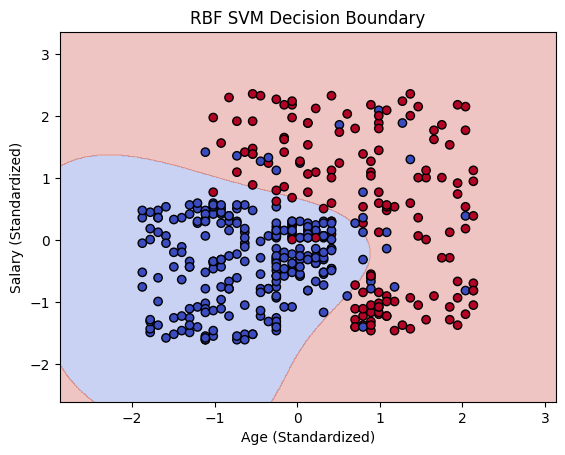

In [10]:
# Q7. Decision Boundary Visualization

def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('Age (Standardized)')
    plt.ylabel('Salary (Standardized)')
    plt.show()

plot_decision_boundary(svm_linear, X_scaled, y, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_scaled, y, "RBF SVM Decision Boundary")



Gamma = 0.1
Accuracy: 0.94


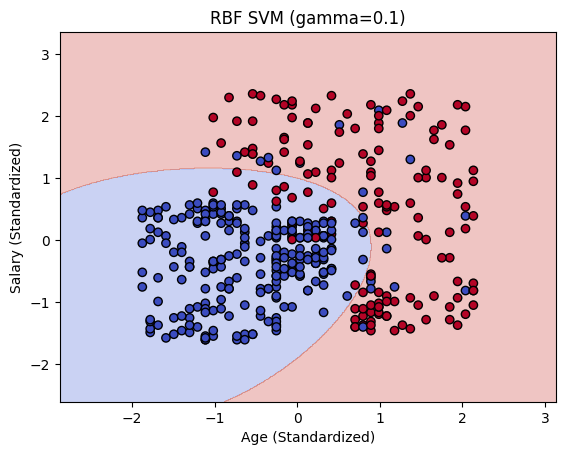


Gamma = 1
Accuracy: 0.94


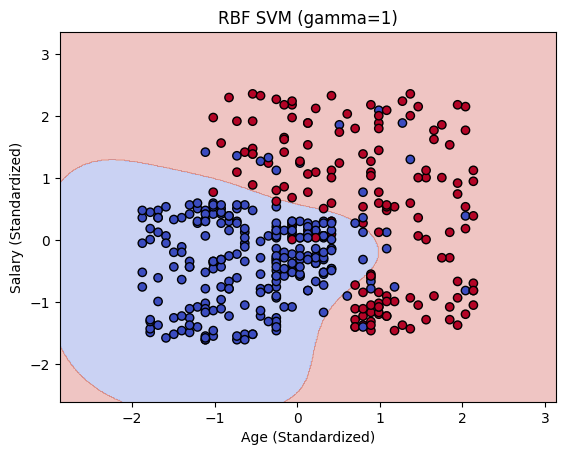


Gamma = 10
Accuracy: 0.93


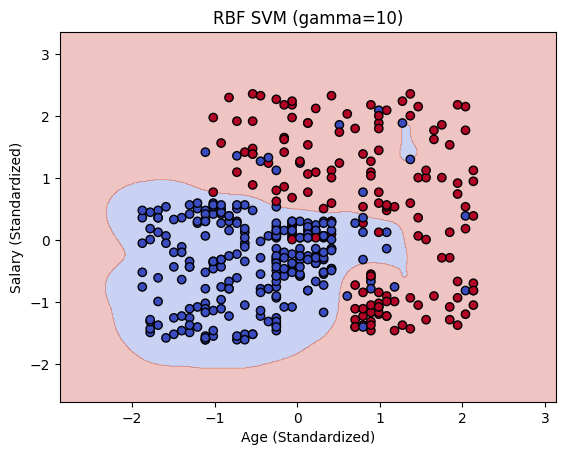

In [11]:
# Q8. Effect of Gamma
# Try different gamma values
for gamma_val in [0.1, 1, 10]:
    svm = SVC(kernel='rbf', gamma=gamma_val)
    svm.fit(X_train, y_train)
    print(f"\nGamma = {gamma_val}")
    y_pred = svm.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    plot_decision_boundary(svm, X_scaled, y, f"RBF SVM (gamma={gamma_val})")


### Observations:
- **Gamma = 0.1**: Underfitting — smoother boundaries, low variance, high bias.
- **Gamma = 1**: Balanced fit — performs well, decision boundary captures complexity.
- **Gamma = 10**: Overfitting — very complex boundaries, low bias but high variance.
